In [9]:
import pandas as pd

data1 = pd.read_csv("../data/전국연도별방문자회계정보정말정말최종ver.csv")

columns_to_extract = ['축제명', 'index_y', '시작월', '개최년도', '(전체)방문자수', '총비용']

df = data1[columns_to_extract].copy()

df.head()


,축제명,index_y,시작월,개최년도,(전체)방문자수,총비용
0,강경젓갈축제,강경젓갈축제2018,10.0,2018,110041,8.250000e+08
1,강경젓갈축제,강경젓갈축제2022,10.0,2022,127900,1.003000e+09
2,강경젓갈축제,강경젓갈축제2023,10.0,2023,124299,1.178086e+09
3,강릉커피축제,강릉커피축제2018,10.0,2018,144268,3.904450e+08
4,강릉커피축제,강릉커피축제2019,10.0,2019,160896,4.400000e+08


In [10]:

df.rename(columns={
    '축제명': 'Festival',
    'index_y': 'name_year',
    '시작월': 'month',
    '개최년도': 'year',
    '(전체)방문자수': 'visitors',
    '총비용': 'cost'
}, inplace=True)

df = df.dropna(subset=['month'])
df['month'] = df['month'].astype(int) 

df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-01')

df['visit/cost'] = df['visitors'] / df['cost']


df.head()

,Festival,name_year,month,year,visitors,cost,date,visit/cost
0,강경젓갈축제,강경젓갈축제2018,10,2018,110041,8.250000e+08,2018-10-01,0.000133
1,강경젓갈축제,강경젓갈축제2022,10,2022,127900,1.003000e+09,2022-10-01,0.000128
2,강경젓갈축제,강경젓갈축제2023,10,2023,124299,1.178086e+09,2023-10-01,0.000106
3,강릉커피축제,강릉커피축제2018,10,2018,144268,3.904450e+08,2018-10-01,0.000369
4,강릉커피축제,강릉커피축제2019,10,2019,160896,4.400000e+08,2019-10-01,0.000366


In [11]:

#iqr로 clip 해주는 함수

def iqr(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df_clipped = df.copy()
    
    for column in columns:
        df_clipped[column] = df[column].clip(lower=lower[column], upper=upper[column])
        
    return df_clipped

df_grouped = df.groupby('date')[['visitors', 'cost', 'visit/cost']].mean()

columns_to_check = ['visitors', 'cost', 'visit/cost']
df_iqr = iqr(df_grouped, columns_to_check)

df_iqr.head()


,visitors,cost,visit/cost
date,,,
2018-01-01,297563.250,2.187776e+09,0.000155
2018-03-01,220763.500,1.164075e+09,0.000176
2018-04-01,143191.800,1.023438e+09,0.000152
2018-05-01,147641.125,8.488898e+08,0.000245
2018-06-01,39979.000,1.082710e+09,0.000037


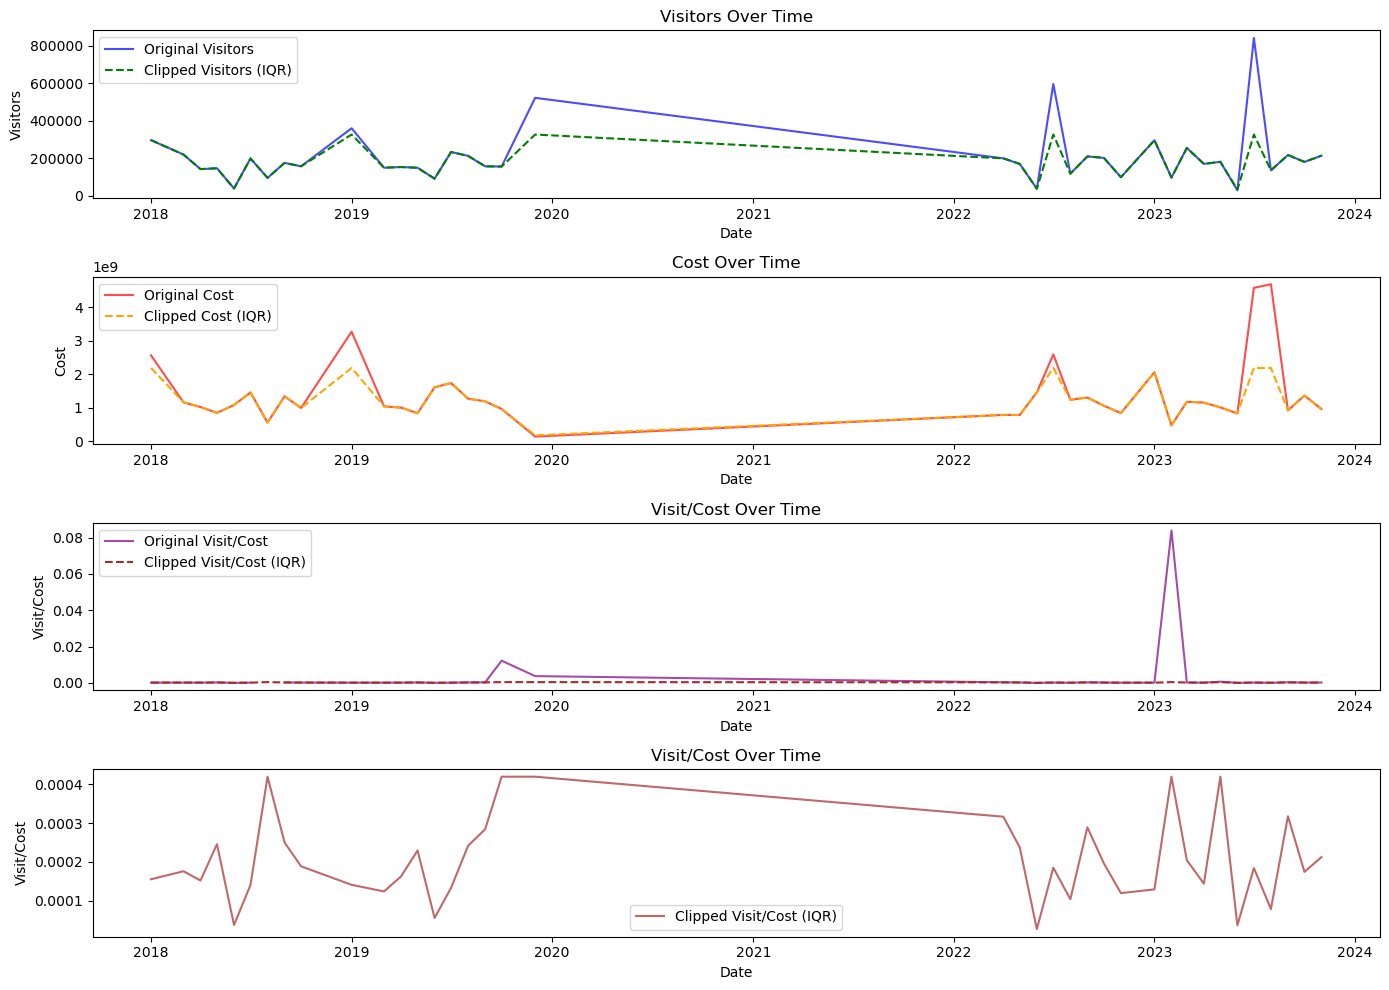

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))

# 'visitors'
plt.subplot(4, 1, 1)
plt.plot(df_grouped.index, df_grouped['visitors'], label='Original Visitors', color='blue', alpha=0.7)
plt.plot(df_iqr.index, df_iqr['visitors'], label='Clipped Visitors (IQR)', color='green', linestyle='--')
plt.title('Visitors Over Time')
plt.xlabel('Date')
plt.ylabel('Visitors')
plt.legend()

# 'cost' 
plt.subplot(4, 1, 2)
plt.plot(df_grouped.index, df_grouped['cost'], label='Original Cost', color='red', alpha=0.7)
plt.plot(df_iqr.index, df_iqr['cost'], label='Clipped Cost (IQR)', color='orange', linestyle='--')
plt.title('Cost Over Time')
plt.xlabel('Date')
plt.ylabel('Cost')
plt.legend()

# 'visit/cost' 
plt.subplot(4, 1, 3)
plt.plot(df_grouped.index, df_grouped['visit/cost'], label='Original Visit/Cost', color='purple', alpha=0.7)
plt.plot(df_iqr.index, df_iqr['visit/cost'], label='Clipped Visit/Cost (IQR)', color='brown', linestyle='--')
plt.title('Visit/Cost Over Time')
plt.xlabel('Date')
plt.ylabel('Visit/Cost')
plt.legend()

# 'visit/cost' clip
plt.subplot(4, 1, 4)
plt.plot(df_iqr.index, df_iqr['visit/cost'], label='Clipped Visit/Cost (IQR)', color='brown', alpha=0.7)
plt.title('Visit/Cost Over Time')
plt.xlabel('Date')
plt.ylabel('Visit/Cost')
plt.legend()


# 그래프 출력
plt.tight_layout()
plt.show()



In [13]:

age_group = pd.read_csv("../data/연령대별구분.csv")

age_group.rename(columns={'축제명': 'Festival'}, inplace=True)

df = df.merge(age_group[['Festival', 'target']], on='Festival', how='left')

map = {
    '장년층': 'old',
    '가족': 'family',
    '청년': 'youth'}

df['target'] = df['target'].map(map)

df.head()



,Festival,name_year,month,year,visitors,cost,date,visit/cost,target
0,강경젓갈축제,강경젓갈축제2018,10,2018,110041,8.250000e+08,2018-10-01,0.000133,old
1,강경젓갈축제,강경젓갈축제2022,10,2022,127900,1.003000e+09,2022-10-01,0.000128,old
2,강경젓갈축제,강경젓갈축제2023,10,2023,124299,1.178086e+09,2023-10-01,0.000106,old
3,강릉커피축제,강릉커피축제2018,10,2018,144268,3.904450e+08,2018-10-01,0.000369,family
4,강릉커피축제,강릉커피축제2019,10,2019,160896,4.400000e+08,2019-10-01,0.000366,family


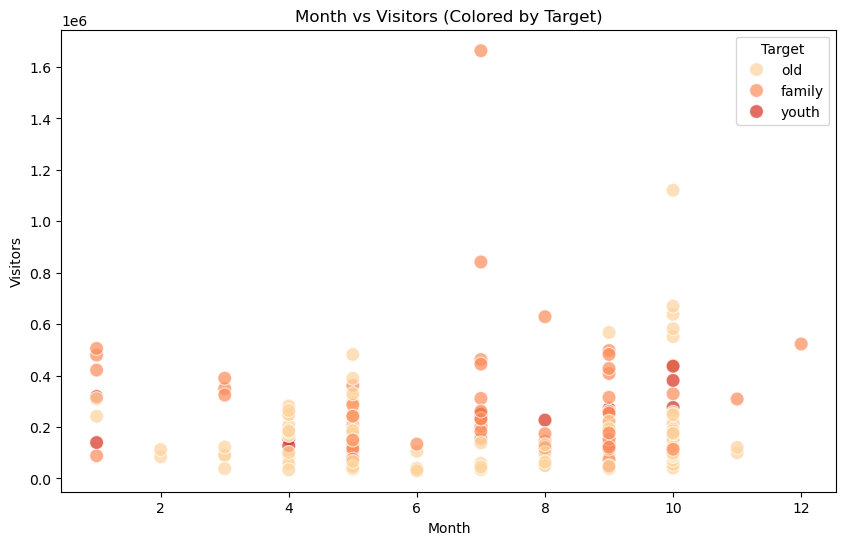

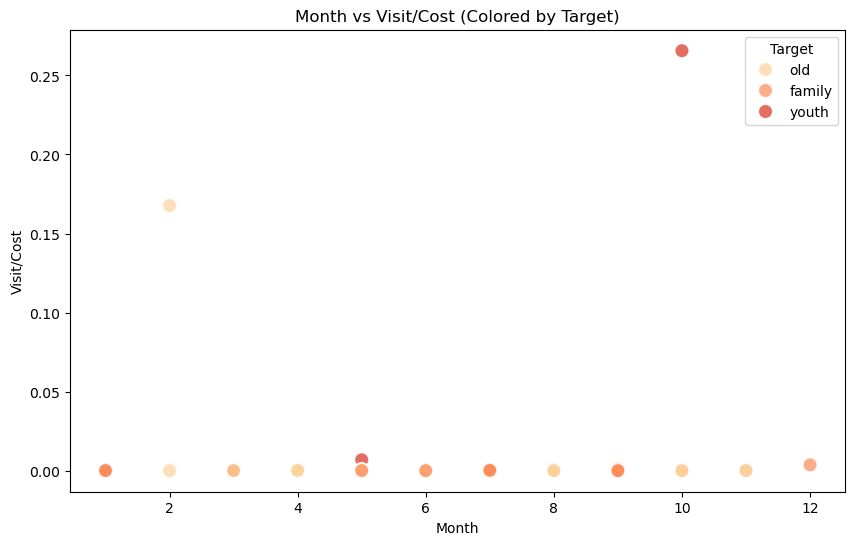

In [14]:
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.scatterplot(x='month', y='visitors', hue='target', data=df, palette='OrRd', s=100, alpha=0.7)

plt.title('Month vs Visitors (Colored by Target)')
plt.xlabel('Month')
plt.ylabel('Visitors')
plt.legend(title='Target')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='month', y='visit/cost', hue='target', data=df, palette='OrRd', s=100, alpha=0.7)

plt.title('Month vs Visit/Cost (Colored by Target)')
plt.xlabel('Month')
plt.ylabel('Visit/Cost')
plt.legend(title='Target')
plt.show()